# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn
##  Урок 8. Видеоурок. Обучение без учителя в Scikit-learn.

### Задание 1
- Импортируйте библиотеки `pandas`, `numpy` и `matplotlib`. Загрузите `Boston House Prices dataset` из встроенных наборов данных библиотеки `sklearn`. Создайте датафреймы `X` и `y` из этих данных.
- Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.
- Масштабируйте данные с помощью `StandardScaler`.
- Постройте модель `TSNE` на тренировочный данных с параметрами: `n_components=2`, `learning_rate=250`, `random_state=42`.
- Постройте диаграмму рассеяния на этих данных.

In [1]:
# Установка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# Загрузка данных Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
# Преобразование данных в датафреймы pandas
X = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
y = pd.DataFrame(target, columns=["MEDV"])

In [4]:
# Разбиение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Обучение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

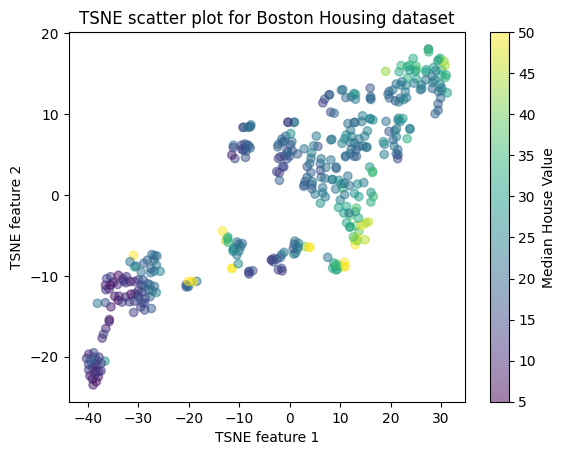

In [7]:
# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train['MEDV'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('TSNE feature 1')
plt.ylabel('TSNE feature 2')
plt.title('TSNE scatter plot for Boston Housing dataset')
plt.show()

Комментарий:

Этот код выполняет следующие шаги:

* Загружает данные Boston Housing dataset из исходного источника.
* Преобразует загруженные данные в датафреймы pandas.
* Разбивает данные на тренировочные и тестовые наборы.
* Масштабирует данные с помощью StandardScaler.
* Обучает модель t-SNE на тренировочных данных.
* Строит диаграмму рассеяния с использованием результатов t-SNE и цветов, соответствующих средней стоимости домов.

### Задание 2
- С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`. Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения `price` и `CRIM` в разных кластерах.

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Кластеризация данных с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


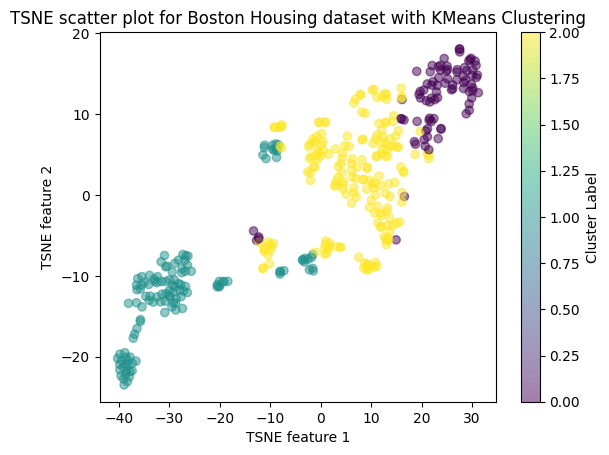

In [10]:
# Построение диаграммы рассеяния с раскраской по кластерам
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.xlabel('TSNE feature 1')
plt.ylabel('TSNE feature 2')
plt.title('TSNE scatter plot for Boston Housing dataset with KMeans Clustering')
plt.show()

In [11]:
# Вычисление средних значений price и CRIM для каждого кластера
for i in range(3):
    cluster_mask = X_train_kmeans == i
    cluster_data = X_train[cluster_mask]
    cluster_price_mean = y_train[cluster_mask].mean()
    cluster_crim_mean = cluster_data['CRIM'].mean()
    print(f"Cluster {i}: Average Price = {cluster_price_mean['MEDV']:.2f}, Average CRIM = {cluster_crim_mean:.2f}")

Cluster 0: Average Price = 27.79, Average CRIM = 0.07
Cluster 1: Average Price = 16.17, Average CRIM = 10.80
Cluster 2: Average Price = 24.96, Average CRIM = 0.42


Комментарий:

Этот код выполняет следующие шаги:

* Использует KMeans из sklearn.cluster для кластеризации данных.
* Обучает модель KMeans на масштабированных тренировочных данных и присваивает метки кластеров к тренировочным данным.
* Строит диаграмму рассеяния с использованием данных t-SNE и раскрашивает точки в соответствии с метками кластеров.
* Вычисляет и выводит средние значения цены (MEDV) и уровня преступности (CRIM) для каждого кластера.

Выводы следующие:

* Кластер 0: Районы с высокими ценами на жилье и очень низким уровнем преступности.
* Кластер 1: Районы с низкими ценами на жилье и высоким уровнем преступности.
* Кластер 2: Районы со средними ценами на жилье и низким уровнем преступности.

Модель KMeans выявила различия в ценах на жилье и уровнях преступности между кластерами на тренировочных данных.



### *Задание 3

- Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [12]:
# Применение модели KMeans к тестовым данным
X_test_kmeans = kmeans.predict(X_test_scaled)

In [13]:
# Вычисление средних значений price и CRIM для каждого кластера на тестовых данных
for i in range(3):
    cluster_mask_test = X_test_kmeans == i
    cluster_data_test = X_test[cluster_mask_test]
    cluster_price_mean_test = y_test[cluster_mask_test].mean()
    cluster_crim_mean_test = cluster_data_test['CRIM'].mean()
    print(f"Cluster {i} (Test): Average Price = {cluster_price_mean_test['MEDV']:.2f}, Average CRIM = {cluster_crim_mean_test:.2f}")

Cluster 0 (Test): Average Price = 31.35, Average CRIM = 0.06
Cluster 1 (Test): Average Price = 16.44, Average CRIM = 10.17
Cluster 2 (Test): Average Price = 21.86, Average CRIM = 0.27


Комментарий:

Этот код выполняет следующие шаги:

* Используется метод predict модели KMeans для определения принадлежности каждого объекта из тестового набора данных к одному из кластеров.
* Для каждого кластера вычисляется средние значения цены и уровня преступности, используя маски cluster_mask_test для фильтрации данных по кластерам.
* Выводятся полученные средние значения для каждого кластера.

Выводы следующие:

* Кластер 0: Благополучные районы с высокими ценами на жилье и очень низким уровнем преступности.
* Кластер 1: Районы с низкими ценами на жилье и очень высоким уровнем преступности.
* Кластер 2: Районы со средними ценами на жилье и умеренным уровнем преступности.

Модель KMeans последовательно разделила районы на кластеры по социально-экономическим признакам как на тренировочных, так и на тестовых данных.